In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load MNIST dataset directly from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Flatten images (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test  = x_test.reshape((x_test.shape[0], 28 * 28))

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [8]:
# Build a feedforward neural network
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    verbose=2
)


Epoch 1/15
422/422 - 2s - 5ms/step - accuracy: 0.6669 - loss: 1.3235 - val_accuracy: 0.8742 - val_loss: 0.6057
Epoch 2/15
422/422 - 1s - 2ms/step - accuracy: 0.8583 - loss: 0.5408 - val_accuracy: 0.9043 - val_loss: 0.3783
Epoch 3/15
422/422 - 1s - 2ms/step - accuracy: 0.8864 - loss: 0.4152 - val_accuracy: 0.9155 - val_loss: 0.3158
Epoch 4/15
422/422 - 1s - 2ms/step - accuracy: 0.8977 - loss: 0.3643 - val_accuracy: 0.9197 - val_loss: 0.2837
Epoch 5/15
422/422 - 1s - 2ms/step - accuracy: 0.9052 - loss: 0.3341 - val_accuracy: 0.9250 - val_loss: 0.2648
Epoch 6/15
422/422 - 1s - 2ms/step - accuracy: 0.9109 - loss: 0.3126 - val_accuracy: 0.9280 - val_loss: 0.2497
Epoch 7/15
422/422 - 1s - 2ms/step - accuracy: 0.9168 - loss: 0.2951 - val_accuracy: 0.9327 - val_loss: 0.2367
Epoch 8/15
422/422 - 1s - 2ms/step - accuracy: 0.9203 - loss: 0.2804 - val_accuracy: 0.9352 - val_loss: 0.2265
Epoch 9/15
422/422 - 1s - 2ms/step - accuracy: 0.9238 - loss: 0.2674 - val_accuracy: 0.9372 - val_loss: 0.2168
E

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")


313/313 - 0s - 1ms/step - accuracy: 0.9433 - loss: 0.2006

 Test Accuracy: 94.33%


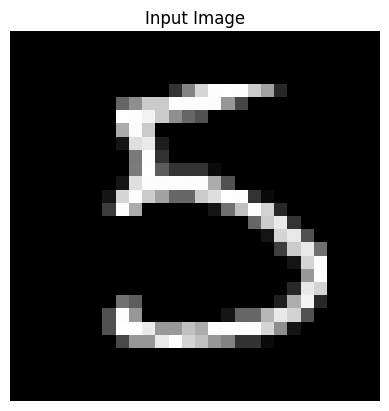

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Digit: 5
Confidence Scores: [[9.3934522e-04 1.0803886e-03 9.1784919e-04 4.2207766e-02 2.1107390e-04
  9.1073906e-01 2.3500803e-04 2.3636923e-04 4.3207709e-02 2.2550100e-04]]


In [11]:
def predict_digit(image_index):
    plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    pred = model.predict(x_test[image_index].reshape(1, 784))
    predicted_label = np.argmax(pred)
    print("Predicted Digit:", predicted_label)
    print("Confidence Scores:", pred)

# Example
predict_digit(15)


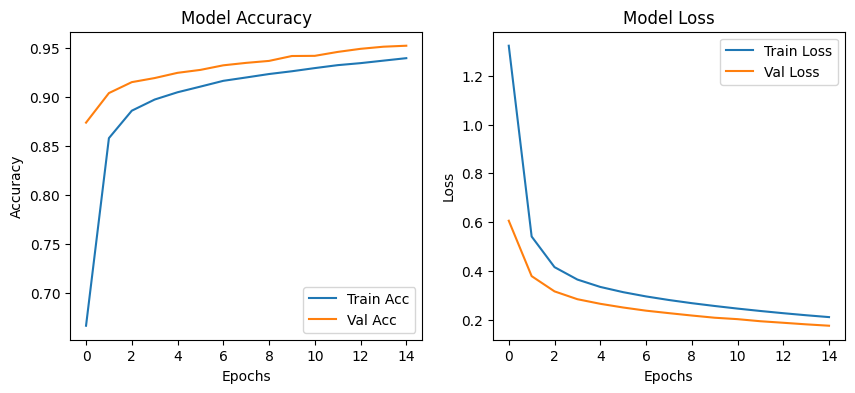

In [12]:
# Plot training vs validation accuracy/loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
